In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
from itertools import combinations

## Load the Data

In [2]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_1/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_1/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Output
0,0.319404,0.762959,1.322677e-79
1,0.574329,0.879898,1.033078e-46
2,0.731024,0.733000,7.710875e-16
3,0.840353,0.264732,3.341771e-124
4,0.650114,0.681526,-3.606063e-03
5,0.410437,0.147554,-2.159249e-54
6,0.312691,0.078723,-2.089093e-91
7,0.683418,0.861057,2.535001e-40
8,0.082507,0.403488,3.606771e-81
9,0.883890,0.582254,6.229856e-48


In [3]:
#Adicion de datos conforme el concurso ha avanzado

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Output':1.36e-134}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# 5 may
new_data=[0.75,0.6,1.84506867231124E-12]
df.loc[len(df)] = new_data

new_data=[0.05,0.95,4.406064392151E-291]
df.loc[len(df)] = new_data


# 10 may
new_data=[0.6,0.6,0.0255592853398297]
df.loc[len(df)] = new_data

new_data=[0.99,0.99,5.3094306962609E-183]
df.loc[len(df)] = new_data

new_data=[0.99,0.01,0]
df.loc[len(df)] = new_data

#17 may
df.loc[len(df)]=[0.434343,0.454545,0.028354367256360813]

#Print
df


,Input_1,Input_2,Output
0,0.319404,0.762959,1.322677e-79
1,0.574329,0.879898,1.033078e-46
2,0.731024,0.733000,7.710875e-16
3,0.840353,0.264732,3.341771e-124
4,0.650114,0.681526,-3.606063e-03
5,0.410437,0.147554,-2.159249e-54
6,0.312691,0.078723,-2.089093e-91
7,0.683418,0.861057,2.535001e-40
8,0.082507,0.403488,3.606771e-81
9,0.883890,0.582254,6.229856e-48


In [244]:

# Define the small constant epsilon
#epsilon = 1e-100

# Apply the logarithmic transformation to the 'contamination_level' column
#df['transf_output'] = np.sign(df['Output'])*df['Output']**2
#df['transf_output_1000'] = df['transf_output']*1000
#df['Output']=df['transf_output_1000']
#df

# Function 1: Searching for Contamination Sources

### This may sound simple because you only have a two-dimensional input, however it is a very difficult problem. It corresponds to trying to find the source of radiation in some square area. However, you can only detect the radiation once you are very close to it, meaning most of the readings will be zero. There are two sources, one is not too dangerous, so make sure you try to find both modes of the function.

## Data exploration

In [4]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
         Input_1    Input_2         Output
count  17.000000  17.000000   1.700000e+01
mean    0.553742   0.535932   2.959270e-03
std     0.305159   0.319985   9.087688e-03
min     0.050000   0.010000  -3.606063e-03
25%     0.319404   0.264732  4.406064e-291
50%     0.600000   0.600000   3.606771e-81
75%     0.750000   0.762959   2.535001e-40
max     0.990000   0.990000   2.835437e-02

Missing values in the dataset:
Input_1    0
Input_2    0
Output     0
dtype: int64


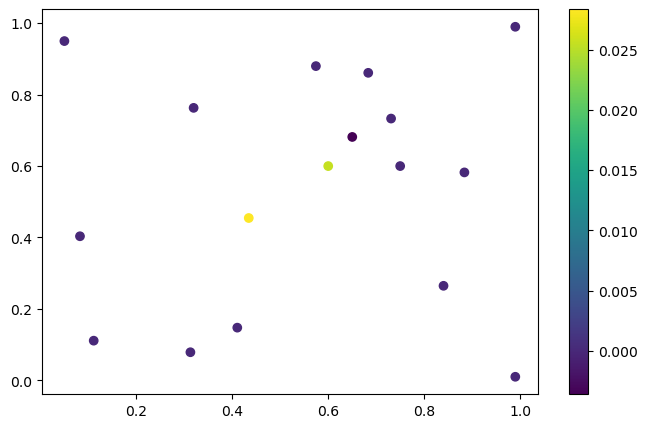

In [5]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(df['Input_1'], df['Input_2'], c = df['Output'])
plt.colorbar();

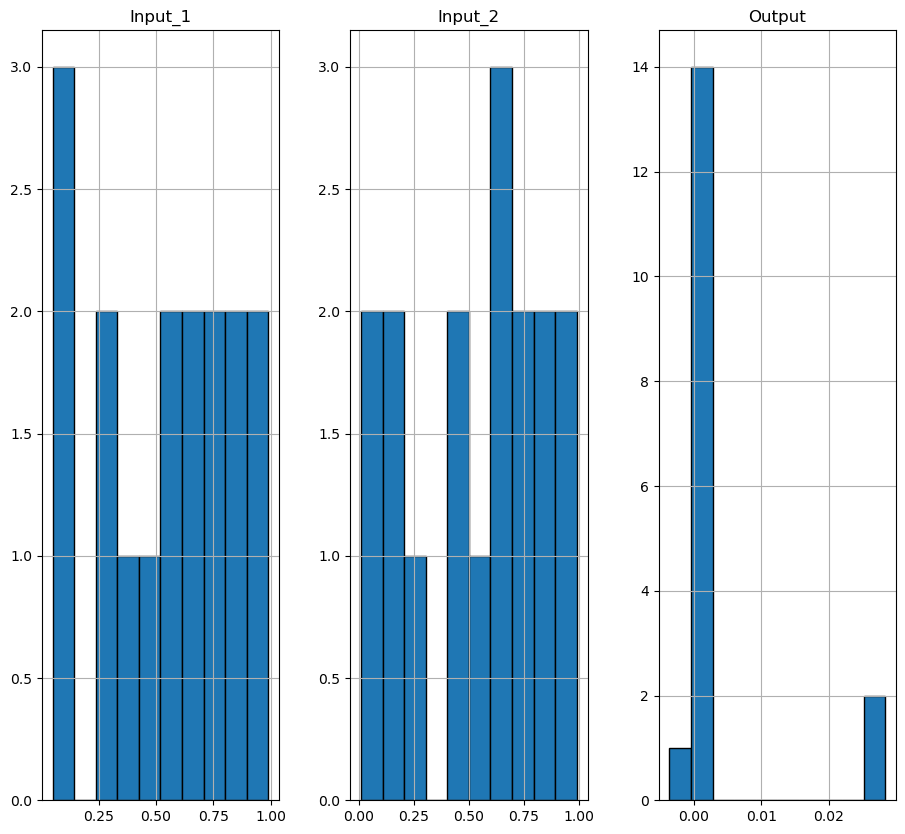

In [6]:
# Plot histograms for each column to understand distributions
df.hist(bins=10, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.25)
plt.show()

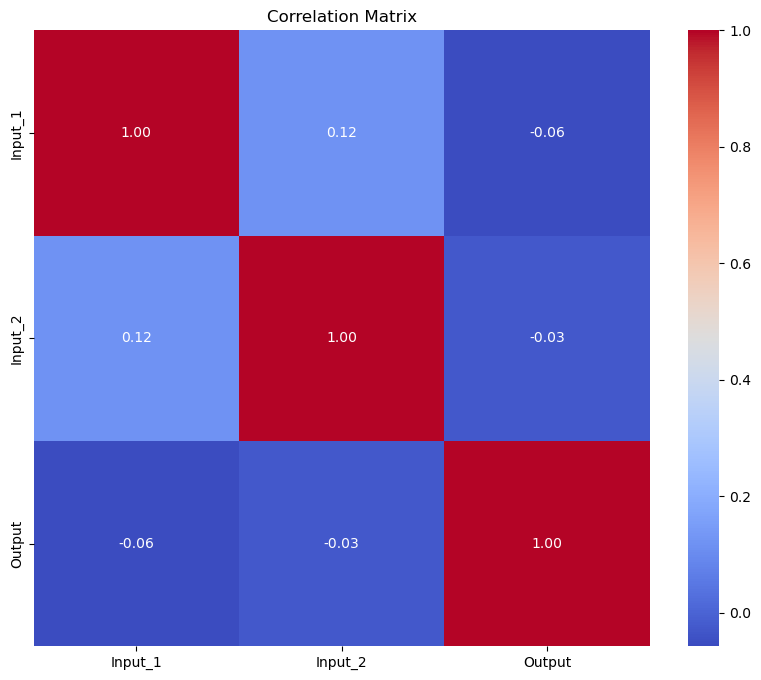

In [7]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

ValueError: Maximum allowed size exceeded

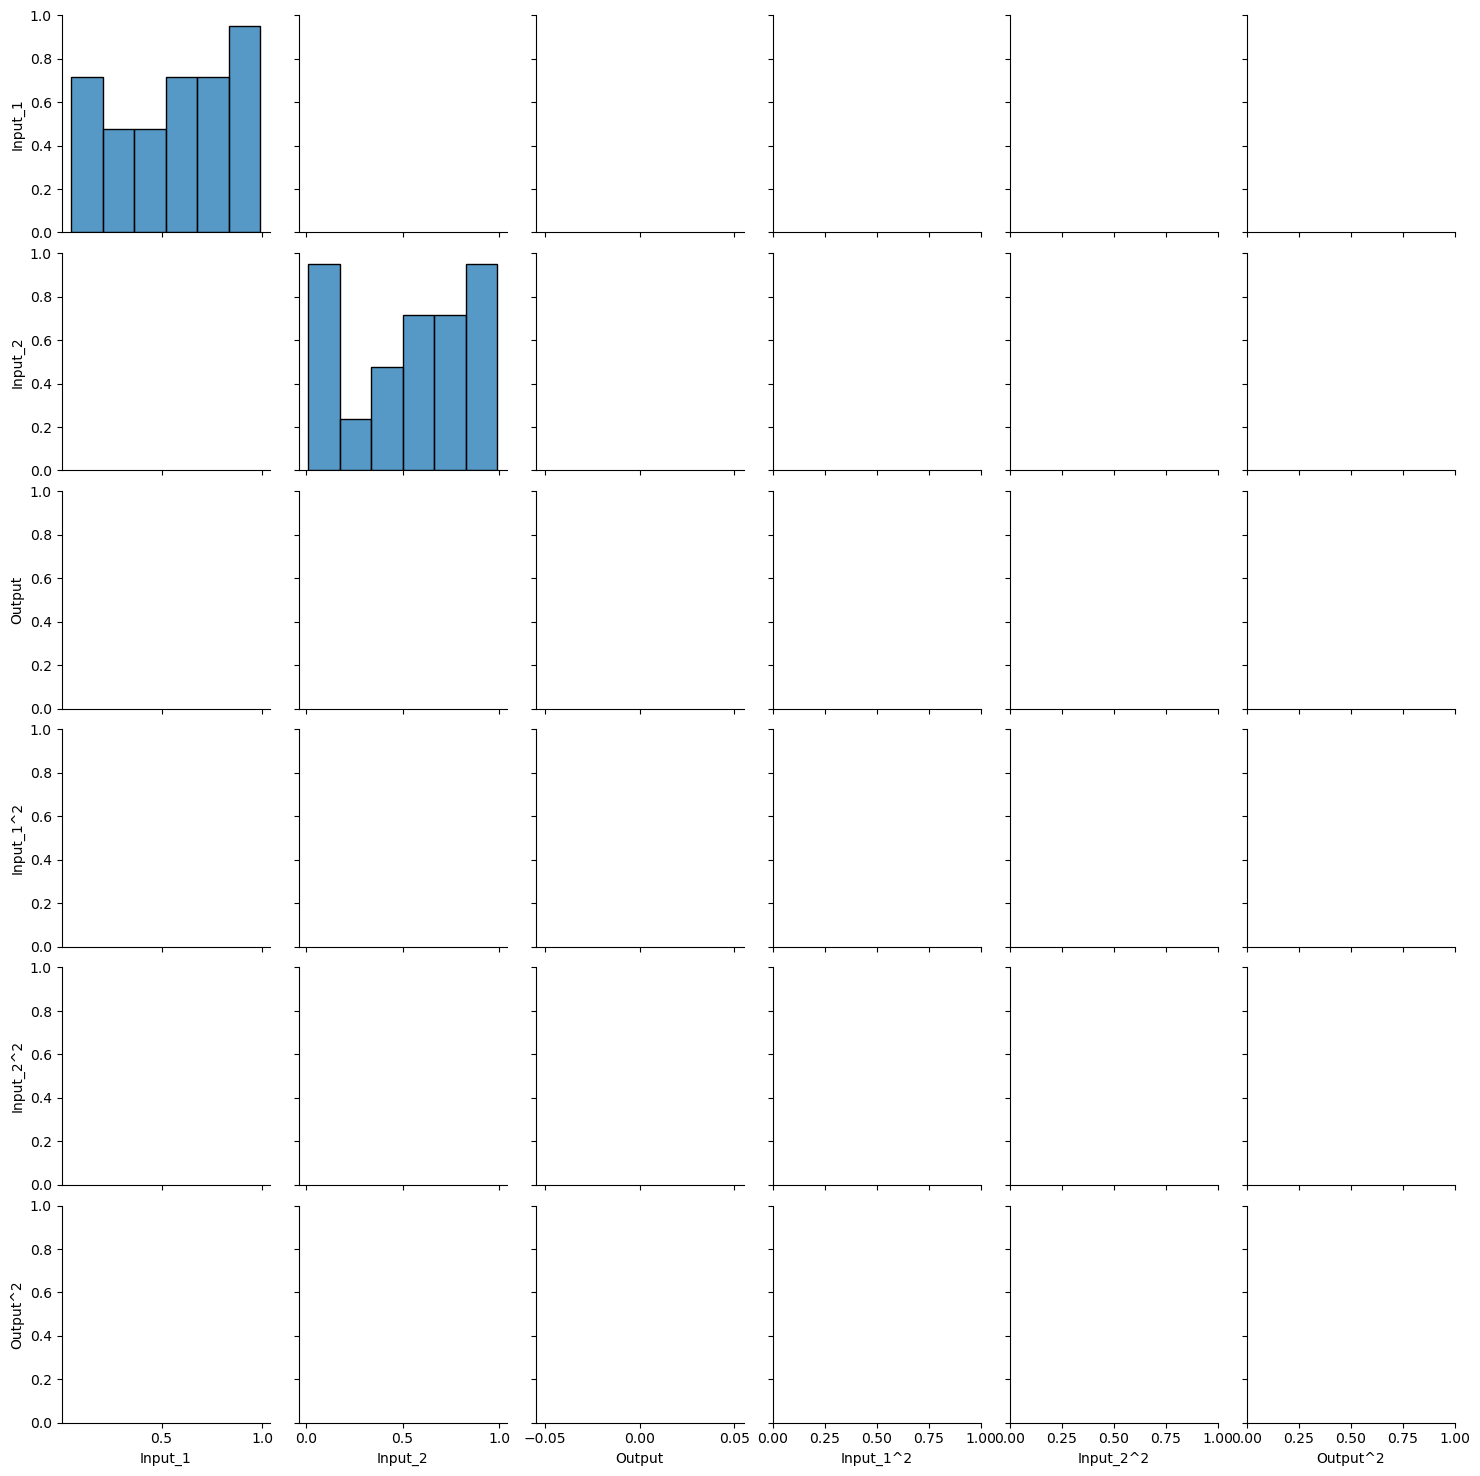

In [9]:
# Use pairplot to visualize the relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='hist', markers='+')
plt.suptitle('Pairwise Relationships', verticalalignment='baseline', fontsize=16)
plt.show()

### Tasks

- Detect Outliers
- Data normalization if needed
- 

## FOR THIS CASE ONLY (Model 1)
### Transform the Output to explore further as this are very small contamination numbers

0    -181.624565
1    -105.886371
2     -34.798730
3    -230.258509
4      -5.625139
5    -123.569835
6    -208.798513
7     -91.173210
8    -185.226580
9    -108.694731
10   -230.258509
11    -27.018505
12   -230.258509
13     -3.666755
14   -230.258509
15   -230.258509
16     -3.562974
Name: Log_Output, dtype: float64
Basic Statistical Summary:
         Input_1    Input_2         Output  Input_1^2  Input_2^2  \
count  17.000000  17.000000   1.700000e+01  17.000000  17.000000   
mean    0.553742   0.535932   2.959270e-03   0.394275   0.383591   
std     0.305159   0.319985   9.087688e-03   0.326811   0.327393   
min     0.050000   0.010000  -3.606063e-03   0.002500   0.000100   
25%     0.319404   0.264732  4.406064e-291   0.102019   0.070083   
50%     0.600000   0.600000   3.606771e-81   0.360000   0.360000   
75%     0.750000   0.762959   2.535001e-40   0.562500   0.582107   
max     0.990000   0.990000   2.835437e-02   0.980100   0.980100   

            Output^2  Log_Output  
cou

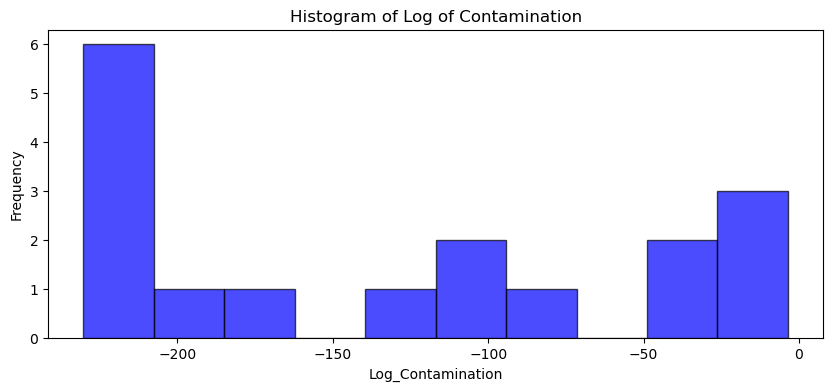

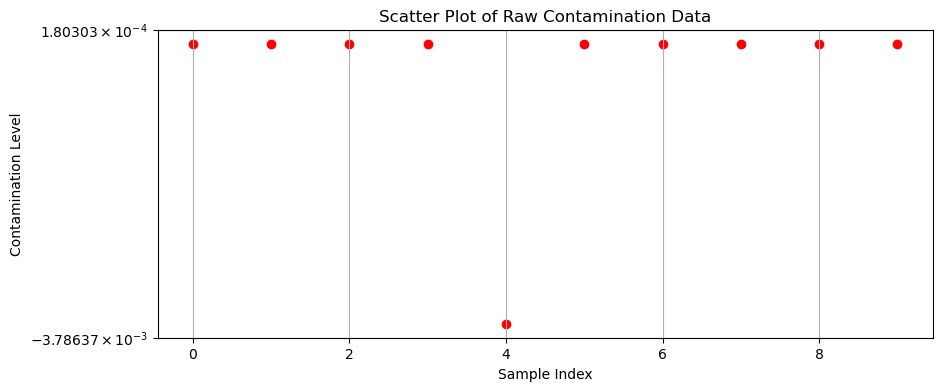

In [10]:
# Transform data: Apply a logarithmic transformation
# Small epsilon to avoid log(0) issues, assuming all values are supposed to be non-negative
epsilon = 1e-100
df['Log_Output'] = np.log(df['Output'].abs() + epsilon)
print(df['Log_Output'])

# Basic Statistics
print("Basic Statistical Summary:")
print(df.describe())

# Histograms to explore each variable
plt.figure(figsize=(10, 4))
plt.hist(df['Log_Output'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Log of Contamination')
plt.xlabel('Log_Contamination')
plt.ylabel('Frequency')
plt.show()

# Additional plot to show raw data
plt.figure(figsize=(10, 4))
plt.scatter(range(len(outputs)), outputs, color='red')
plt.title('Scatter Plot of Raw Contamination Data')
plt.xlabel('Sample Index')
plt.ylabel('Contamination Level')
plt.yscale('symlog')  # Using a symmetric log scale due to negative values
plt.grid(True)
plt.show()

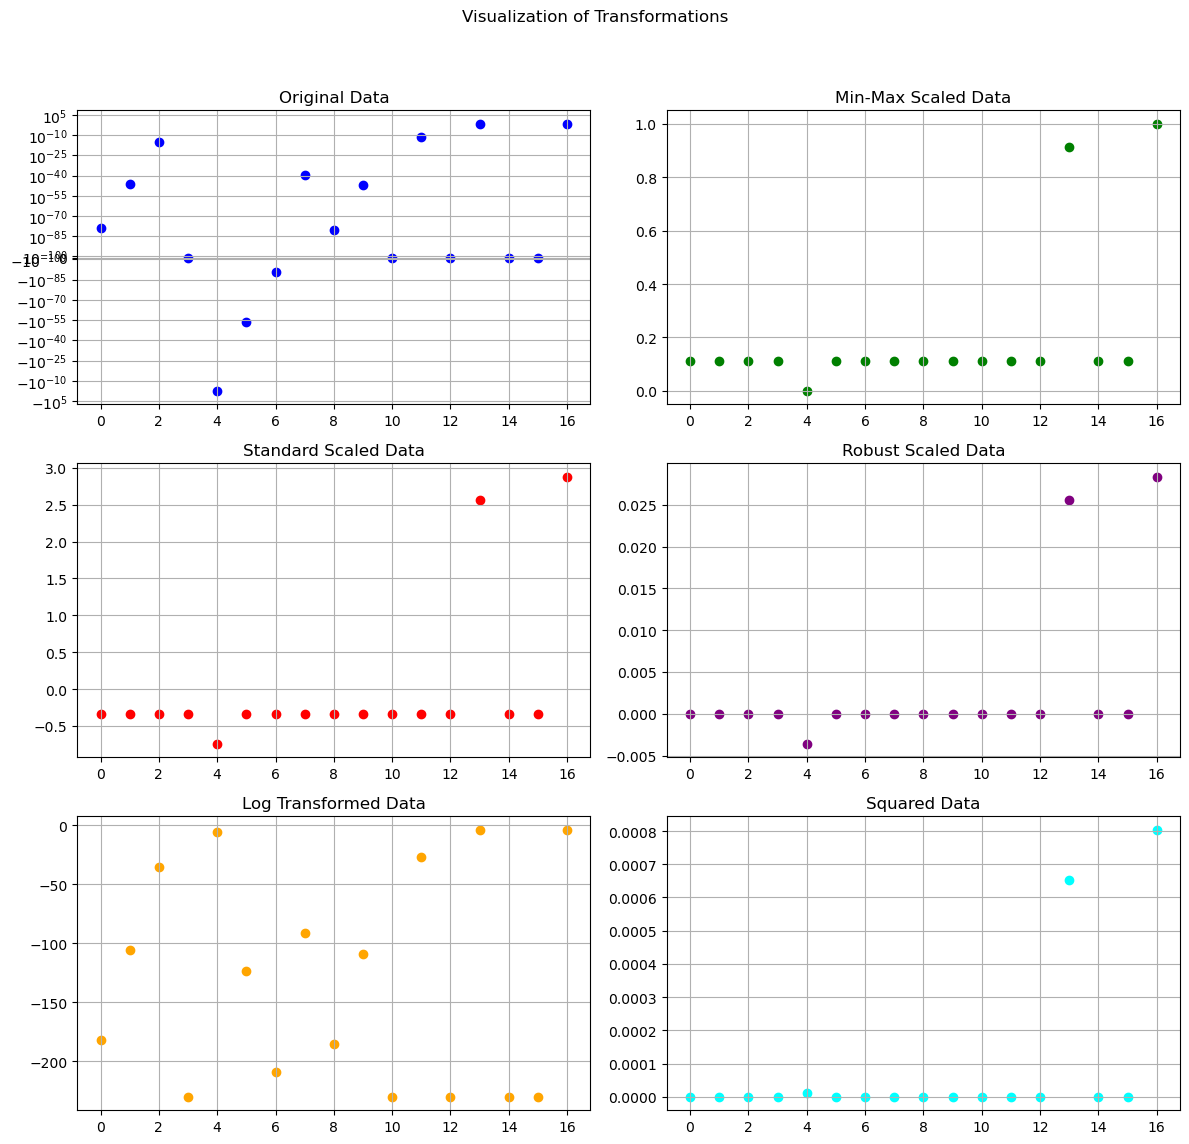

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import norm

# Applying various transformations
scaler_min_max = MinMaxScaler()
df['Min_Max_Scaled'] = scaler_min_max.fit_transform(df[['Output']])

scaler_standard = StandardScaler()
df['Standard_Scaled'] = scaler_standard.fit_transform(df[['Output']])

scaler_robust = RobustScaler()
df['Robust_Scaled'] = scaler_robust.fit_transform(df[['Output']])

# Log transformation with a small shift to handle zero and negative values
epsilon = 1e-100  # Small constant to avoid log(0)
df['Log_Transformed'] = np.log(df['Output'].abs() + epsilon)

# Square transformation
df['Squared'] = np.power(df['Output'], 2)

# Plotting the original and transformed data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Visualization of Transformations')

# Original Data
axes[0, 0].scatter(df.index, df['Output'], color='blue')
axes[0, 0].set_title('Original Data')
axes[0, 0].set_yscale('symlog', linthresh=epsilon)
axes[0, 0].grid(True)

# Min-Max Scaled Data
axes[0, 1].scatter(df.index, df['Min_Max_Scaled'], color='green')
axes[0, 1].set_title('Min-Max Scaled Data')
axes[0, 1].grid(True)

# Standard Scaled Data
axes[1, 0].scatter(df.index, df['Standard_Scaled'], color='red')
axes[1, 0].set_title('Standard Scaled Data')
axes[1, 0].grid(True)

# Robust Scaled Data
axes[1, 1].scatter(df.index, df['Robust_Scaled'], color='purple')
axes[1, 1].set_title('Robust Scaled Data')
axes[1, 1].grid(True)

# Log Transformed Data
axes[2, 0].scatter(df.index, df['Log_Transformed'], color='orange')
axes[2, 0].set_title('Log Transformed Data')
axes[2, 0].grid(True)

# Squared Data
axes[2, 1].scatter(df.index, df['Squared'], color='cyan')
axes[2, 1].set_title('Squared Data')
axes[2, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Removing the outlier (negative 'large' value) para ver como se ven los datos

In [12]:
new_df_out=df[['Input_1','Input_2','Output']]
new_df_out=new_df_out.drop(index=4)
new_df_out

,Input_1,Input_2,Output
0,0.319404,0.762959,1.322677e-79
1,0.574329,0.879898,1.033078e-46
2,0.731024,0.733000,7.710875e-16
3,0.840353,0.264732,3.341771e-124
5,0.410437,0.147554,-2.159249e-54
6,0.312691,0.078723,-2.089093e-91
7,0.683418,0.861057,2.535001e-40
8,0.082507,0.403488,3.606771e-81
9,0.883890,0.582254,6.229856e-48
10,0.111111,0.111111,1.360000e-134


In [13]:
# Display basic statistics
print("Basic Statistical Summary:")
print(new_df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(new_df.isnull().sum())

Basic Statistical Summary:
         Input_1    Input_2         Output
count  16.000000  16.000000   1.600000e+01
mean    0.547719   0.526833   3.369603e-03
std     0.314121   0.328200   9.221640e-03
min     0.050000   0.010000  -2.159249e-54
25%     0.317726   0.235437  3.982073e-183
50%     0.587165   0.591127   6.793724e-80
75%     0.772588   0.787484   1.927719e-16
max     0.990000   0.990000   2.835437e-02

Missing values in the dataset:
Input_1    0
Input_2    0
Output     0
dtype: int64


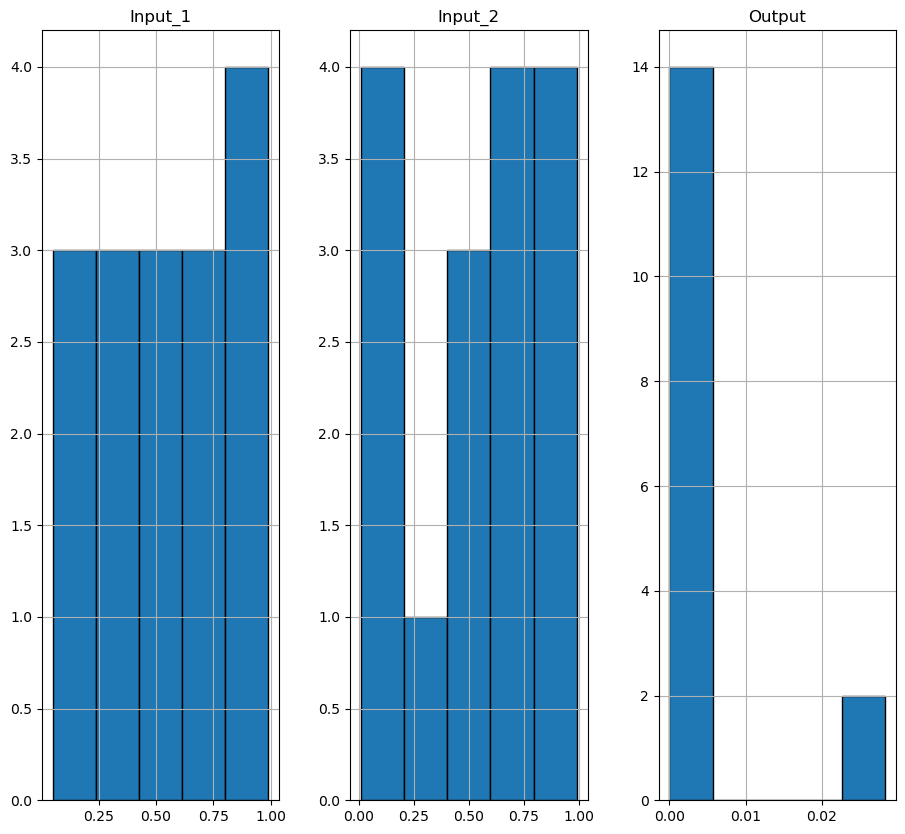

In [14]:
# Plot histograms for each column to understand distributions
new_df.hist(bins=5, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.show()

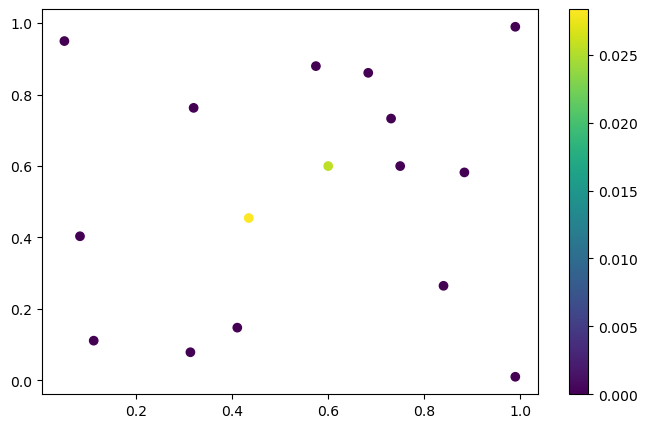

In [15]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(new_df['Input_1'], new_df['Input_2'], c = new_df['Output'])
plt.colorbar();

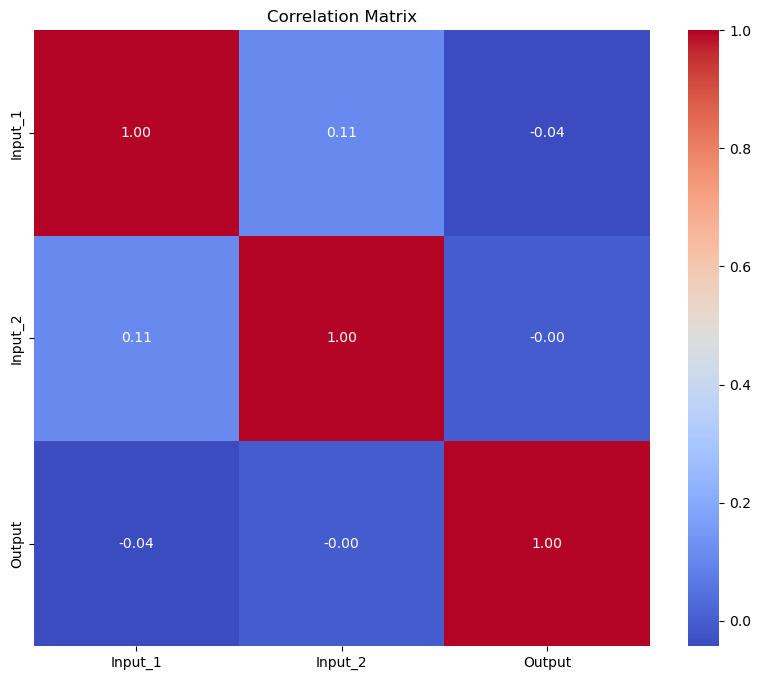

In [16]:
# Compute the correlation matrix
corr = new_df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

0    -181.624565
1    -105.886371
2     -34.798730
3    -230.258509
5    -123.569835
6    -208.798513
7     -91.173210
8    -185.226580
9    -108.694731
10   -230.258509
11    -27.018505
12   -230.258509
13     -3.666755
14   -230.258509
15   -230.258509
16     -3.562974
Name: Log_Output, dtype: float64
Basic Statistical Summary:
         Input_1    Input_2         Output  Log_Output
count  16.000000  16.000000   1.600000e+01   16.000000
mean    0.547719   0.526833   3.369603e-03 -139.082082
std     0.314121   0.328200   9.221640e-03   87.583294
min     0.050000   0.010000  -2.159249e-54 -230.258509
25%     0.317726   0.235437  3.982073e-183 -230.258509
50%     0.587165   0.591127   6.793724e-80 -152.597200
75%     0.772588   0.787484   1.927719e-16  -77.079590
max     0.990000   0.990000   2.835437e-02   -3.562974


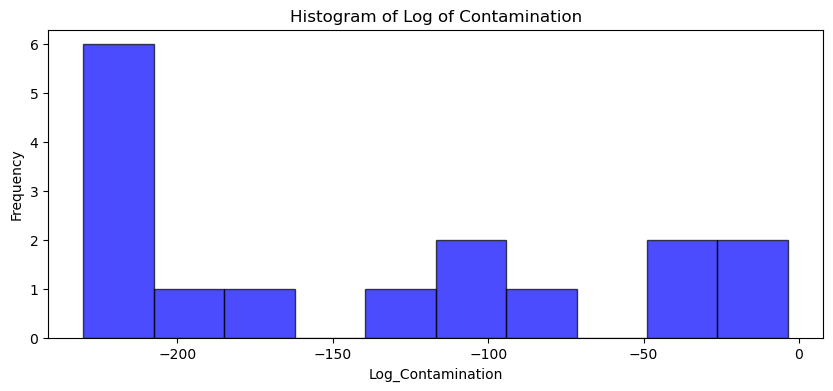

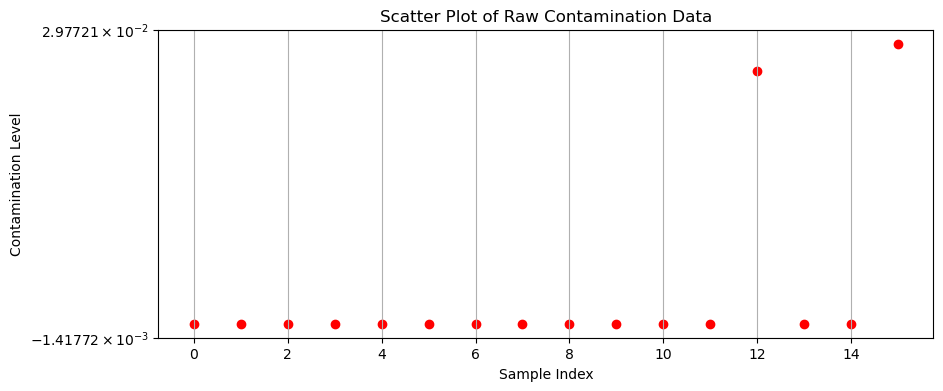

In [17]:
# Transform data: Apply a logarithmic transformation
# Small epsilon to avoid log(0) issues, assuming all values are supposed to be non-negative
epsilon = 1e-100
new_df['Log_Output'] = np.log(new_df['Output'].abs() + epsilon)
print(new_df['Log_Output'])

# Basic Statistics
print("Basic Statistical Summary:")
print(new_df.describe())

# Histograms to explore each variable
plt.figure(figsize=(10, 4))
plt.hist(new_df['Log_Output'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Log of Contamination')
plt.xlabel('Log_Contamination')
plt.ylabel('Frequency')
plt.show()

# Additional plot to show raw data
plt.figure(figsize=(10, 4))
plt.scatter(range(len(new_df['Output'])), new_df['Output'], color='red')
plt.title('Scatter Plot of Raw Contamination Data')
plt.xlabel('Sample Index')
plt.ylabel('Contamination Level')
plt.yscale('symlog')  # Using a symmetric log scale due to negative values
plt.grid(True)
plt.show()

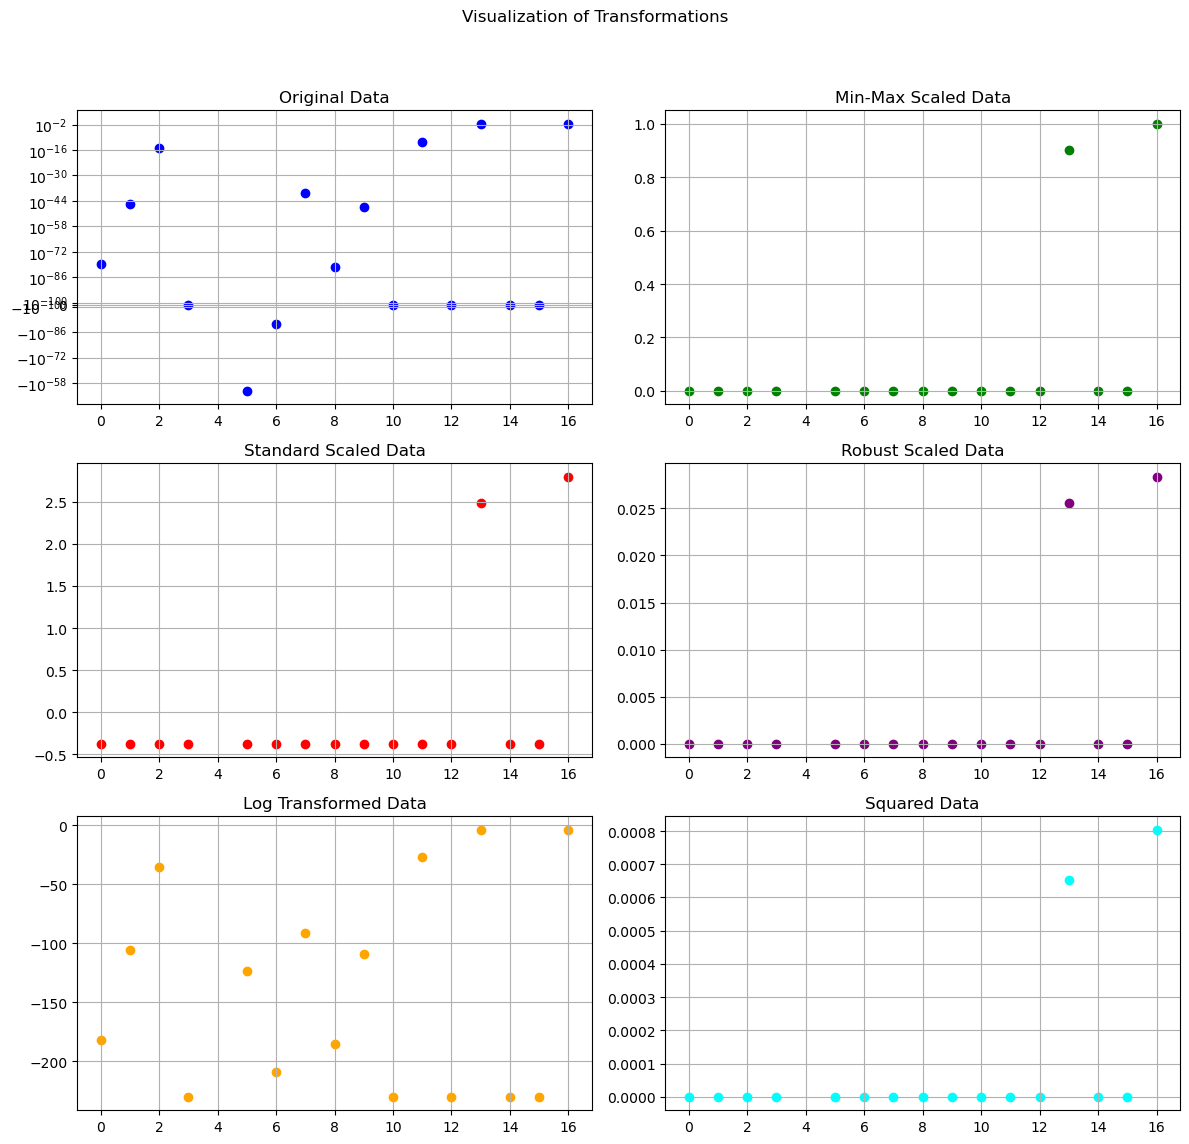

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import norm

# Applying various transformations
scaler_min_max = MinMaxScaler()
new_df['Min_Max_Scaled'] = scaler_min_max.fit_transform(new_df[['Output']])

scaler_standard = StandardScaler()
new_df['Standard_Scaled'] = scaler_standard.fit_transform(new_df[['Output']])

scaler_robust = RobustScaler()
new_df['Robust_Scaled'] = scaler_robust.fit_transform(new_df[['Output']])

# Log transformation with a small shift to handle zero and negative values
epsilon = 1e-100  # Small constant to avoid log(0)
new_df['Log_Transformed'] = np.log(new_df['Output'].abs() + epsilon)

# Square transformation
new_df['Squared'] = np.power(new_df['Output'], 2)

# Plotting the original and transformed data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Visualization of Transformations')

# Original Data
axes[0, 0].scatter(new_df.index, new_df['Output'], color='blue')
axes[0, 0].set_title('Original Data')
axes[0, 0].set_yscale('symlog', linthresh=epsilon)
axes[0, 0].grid(True)

# Min-Max Scaled Data
axes[0, 1].scatter(new_df.index, new_df['Min_Max_Scaled'], color='green')
axes[0, 1].set_title('Min-Max Scaled Data')
axes[0, 1].grid(True)

# Standard Scaled Data
axes[1, 0].scatter(new_df.index, new_df['Standard_Scaled'], color='red')
axes[1, 0].set_title('Standard Scaled Data')
axes[1, 0].grid(True)

# Robust Scaled Data
axes[1, 1].scatter(new_df.index, new_df['Robust_Scaled'], color='purple')
axes[1, 1].set_title('Robust Scaled Data')
axes[1, 1].grid(True)

# Log Transformed Data
axes[2, 0].scatter(new_df.index, new_df['Log_Transformed'], color='orange')
axes[2, 0].set_title('Log Transformed Data')
axes[2, 0].grid(True)

# Squared Data
axes[2, 1].scatter(new_df.index, new_df['Squared'], color='cyan')
axes[2, 1].set_title('Squared Data')
axes[2, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Definir las variables

### **28 Apr

- Explorar eliminando el inoput del valor negativo grande, Index=4 (SUPER NEG)
- Es large pero negativo. Por el momento lo eliminamos pero hay que ver como viene la informacion
- Hay 1 observacion en la zona 0,73/0,73 aprox que es mas grande que los demas (GRANDECIN, index=3)

MODELO
- Hay que jugar mucho con los inputs del GPB para priorizar si explorar cerca de algun valor o lejos. En especial porque no sabemos si SUPER NEG aporta informacion o solo es ruido del modelo. Lo mismo para el GRANDECIN
- Ademas de los parametros, se puede correr el modelo solo en un rango de grid mas cercano a un valor especifico en un rango mucho mas acotado


## Generar surrogate model con Gaussian process

#### noise_assumption (default 1e-10)
Description: This is a hyperparameter for the Gaussian Process model that indicates the noise level in the data used for training the model. It influences the GP's understanding of how much noise is inherent in the outputs it tries to learn.
Adjustments: If the model is underfitting (i.e., not flexible enough to capture the data's variability), you might increase this parameter. Conversely, decrease it if the model is too sensitive to the training data, capturing noise as if it were signal.

#### rbf_lengthscale (default = 1.0)
Description: This parameter of the Radial Basis Function (RBF) kernel, also known as the "length scale," determines how smooth the function is. A larger length scale means the function value changes slowly with changes in input space, resulting in a smoother function model.
Usage: In your Gaussian Process configuration, the RBF kernel uses this length scale to define how quickly the correlation between points decreases with distance. A small length scale leads to a model that can capture rapid changes in the function, while a larger scale will smooth over such changes, potentially missing important details.
Adjustments: Depending on the granularity of changes in your function, you might adjust the rbf_lengthscale. Smaller values can capture finer details, and larger values provide a smoother model.

#### kernel
Description: The kernel function defines the covariance of the process at these points. Essentially, it describes how points in the input space are related to each other based on their distance.
Usage: In the code, the RBF kernel with a fixed length scale is used to construct the covariance matrix of the Gaussian process. The choice of kernel and its parameters heavily influences the behavior of the Gaussian Process, shaping how it generalizes from the observed data to unseen points.
Adjustments: Besides adjusting the length scale, you might consider using different types of kernels based on the properties of your data or even combining multiple kernels to capture various aspects of the data’s structure. For example, adding a WhiteKernel can help to model additional noise effects explicitly.

### Generar acquisition function, maximizar y encontrar el siguiente query

In [71]:
#X=new_df_out[['Input_1','Input_2']]
#y=new_df_out['Output']

X=df[['Input_1','Input_2']]
y=df[['Robust_Scaled']]

#X=df[['Input_1','Input_2']]
#y=df[['Output']]
y

,Robust_Scaled
0,1.286609e-79
1,1.033078e-46
2,7.710875e-16
3,-3.606771e-81
4,-3.606063e-03
5,-2.159249e-54
6,-3.606771e-81
7,2.535001e-40
8,0.000000e+00
9,6.229856e-48


In [67]:
# Parameters of the model
#****************************************
noise_assumption = 1e-2 # noise assumption, a hyper-parameter (default 1e-10)

rbf_lengthscale = .15 # lengthscale parameter (default = 1), comenzaremos con 0.2 y luego ir descendiendo a 0.1 o menos
   #ARD. Automatic relevance determination. Numeros pequeños permiten mas ruido. MAs grande se suaviza. Tambien depende la escala del output. Numeros grandes deberia estar en 1
    
# define kernel of GP
kernel = RBF(length_scale=rbf_lengthscale, length_scale_bounds='fixed')

# Define a kernel with both smooth and rough components, and noise handling
#kernel = Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=0.1) + RationalQuadratic(length_scale=1.0, alpha=0.1)
#kernel=kernel + WhiteKernel(noise_level=1e-5) #ESPECIAL PARA FUNCION 1 POR LAS ANOMALIAS
#kernel = Matern(length_scale=[0.1, 0.1, 0.1], nu=1.5, length_scale_bounds=(0.01, 1), ARD=True)

#Grid:
GG=100    #Numero de datos para cada variable en el Grid.  
dim=2     #Numero de Inputs
#******************************************************

x1 = np.linspace(0.05, 0.95, GG)     #Genera la primer variable. RANGO DE EXPLORACION
X_grid = np.fromiter(it.chain(*it.product(x1, repeat=dim)), dtype=float).reshape(-1,dim) #Genera todas las variables
# Convert X_grid into a DataFrame with meaningful names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)

# Fit the Gaussian process - Surrogate model
GPR_model = GaussianProcessRegressor(kernel = kernel, alpha=noise_assumption)
GPR_model.fit(X, y)

#Genera la funcion del Surrogate model para cada punto del grid
mean, std = GPR_model.predict(X_grid_df, return_std = True)

In [68]:
#Acquisition function
#######################################################

beta = 1.6
acquisition_function = mean + beta * std

#######################################################

idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"[{formatted_row}]")

[0.677273-0.050000]


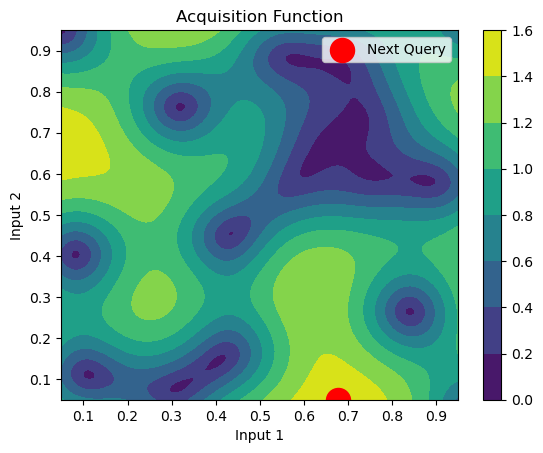

In [69]:
fig, ax = plt.subplots()
cp = ax.contourf(X_grid[:, 0].reshape(GG, GG), X_grid[:, 1].reshape(GG, GG), acquisition_function.reshape(GG, GG))
fig.colorbar(cp)  # Add a colorbar to a plot

# Plot the location of the next query
ax.scatter(next_query[0],next_query[1], color='red', s=300, label='Next Query')
ax.legend()
    
ax.set_title('Acquisition Function')
ax.set_xlabel('Input 1')
ax.set_ylabel('Input 2')
plt.show()

In [70]:
#Acquisition function variando parametros

#######################################################
beta = 1.96
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 1.96",f"[{formatted_row}]")
#######################################################
beta = 0.00000001
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta casi CERO",f"[{formatted_row}]")
#######################################################
beta = 2.6
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 2.6",f"[{formatted_row}]")
#######################################################
acquisition_function = std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("ONLY std",f"[{formatted_row}]")
#######################################################


Beta 1.96 [0.677273-0.050000]
Beta casi CERO [0.531818-0.513636]
Beta 2.6 [0.677273-0.050000]
ONLY std [0.677273-0.050000]


#### 28 Apr. Ask 1. [0.050000-0.950000]

- Casi todo me da explorar un query=(0,1) porque es area inexplorada

- Con lengthscale = 0.1, q:(0,1)
- Con Beta=0, q:(0.80-0,75), y hacia esa zona dependiendo de Beta

Con el rango en 0.1 y 0.9, me arroja ir hacia (0.4,0.46).......sin GRANDECIN esto es (0.51,0.47)
Con el rango en 0,6 y 0,8, me arroja ir hacia (0.75,0,60)

#### 4 May
Vamos a volver a submit el primero y voy a submit uno mas.
Pr si las dudas, voy a subir el original como segundo submit.
- [0.750000-0.600000]
- [0.050000-0.950000]

#### 10 may
- Explorando desde 0 hasta 1, todo normal. (1,0) o podria ser (1,1)....(0.92,0.81) con mucho ruido
- Con rango 0.6-0.8: (0.6,0.6) si manejamos el rango de 
- Si lo abro a 0.6-1, me sigue dando el 1,1
- [0.600000-0.600000]
- [0.990000-0.990000]
- [0.990000-0.010000]

#### 14may
Se alcanzo un nuevo maximo en 0.6,0.6 OJO CON ESTO. 
- LAs correlacionese cayeron significativamente. lo cual indica que son areas muy especificas donde hay informacion.
***
- Con todos los datos y distintos niveles de ruido y lenght ([0.676768-0.000000])
- Sin ruido me manda mas hacia el 0.5 (0.535354-0.515152]) y [0.454545-0.464646]
- Quitando la obervacion outlier negativa:
-   Beta casi CERO [0.444444-0.515152]
-   Beta 2.6 [0.666667-0.000000]
-   o tambien Beta casi CERO [0.535354-0.585859]

*** Cuando hago todo con la transformacion cuadratica
- Beta casi CERO [0.535354-0.515152]
- Beta 2.6 [0.434343-0.454545]
- ONLY std [0.676768-0.000000]
*** SIN OBSERVACION Itlier:
-  Beta casi CERO [0.535354-0.585859]
-  Beta 2.6 [0.414141-0.464646]
-  ONLY std [0.676768-0.000000]

***** Nos vamos a ir por  [0.434343-0.454545]

#### 17 may
Se alcanzo nuevo maximo en [0.434343-0.454545]

De nuevo,con varias combinaciones me manda [0.676768-0.050000]
Si me voy hacia Beta=0, sigue siendo hacia 0.47 y 0.55 de ambos lados



